In [85]:
import numpy as np
import pandas as pd
from sklearn.preprocessing  import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.stem.porter import PorterStemmer

from collections import Counter


In [86]:
import sys
print(sys.executable)

C:\ProgramData\Anaconda3\python.exe


In [4]:
df = pd.read_csv("spam.csv",encoding='ISO-8859-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

# Data Preprocessing 
    1- Data Cleaning
    2- EDA 
    3- Text Preprocessing
    

### 1- Data Cleaninig

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop unnecessary columns
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,axis=1)

In [9]:
df.sample(5)

,v1,v2
5499,ham,Now get step 2 outta the way. Congrats again.
3328,ham,Sac will score big hundred.he is set batsman:-)
1106,ham,"Good afternoon, my love. How goes your day ? W..."
4677,ham,It is a good thing I'm now getting the connect...
4190,ham,"Each Moment in a day,has its own value-Morning..."


In [10]:
# renaming columns 
df = df.rename(columns={'v1':'target','v2':"text"})

In [11]:
df.sample(5)

,target,text
3665,ham,I'm turning off my phone. My moms telling ever...
4404,ham,Dun need to use dial up juz open da browser n ...
1885,ham,I think asking for a gym is the excuse for laz...
5564,ham,Why don't you wait 'til at least wednesday to ...
4971,ham,I'm fine. Hope you are good. Do take care.


In [12]:
df.target.unique()

array(['ham', 'spam'], dtype=object)

In [13]:
#Classification - Binary Classfication

In [14]:
encoder = LabelEncoder()
df.target = encoder.fit_transform(df.target)

In [15]:
df.head(10)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [16]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
df.duplicated().sum()

403

In [18]:
df = df.drop_duplicates(keep="first")

In [19]:
df.shape

(5169, 2)

In [20]:
df.duplicated().sum()

0

### 2. Exploratory Data Analysis (EDA)

In [21]:
label_counts = df.target.value_counts()
label_counts

0    4516
1     653
Name: target, dtype: int64

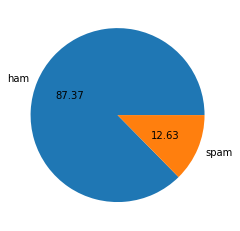

In [22]:
plt.pie(label_counts, labels=['ham','spam'],autopct="%.02f")
plt.show()

In [23]:
df['number_of_char']=df['text'].apply(len)
df.head()

,target,text,number_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
df['number_of_words']=df['text'].apply(lambda x:len(x.split(" ")))
df.head()

,target,text,number_of_char,number_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [25]:
df['number_of_sentences']=df['text'].apply(lambda x:len(x.split(".")))
df.head()

,target,text,number_of_char,number_of_words,number_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9
1,0,Ok lar... Joking wif u oni...,29,6,7
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,7
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [26]:
# number of words using tokenization
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df

,target,text,number_of_char,number_of_words,number_of_sentences,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9,24
1,0,Ok lar... Joking wif u oni...,29,6,7,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,37
3,0,U dun say so early hor... U c already then say...,49,11,7,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,15
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30,5,35
5568,0,Will Ì_ b going to esplanade fr home?,37,8,1,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,10,5,15
5570,0,The guy did some bitching but I acted like i'd...,125,26,1,27


In [28]:
df = df.drop('number_of_words',axis=1)

In [29]:
# number of words using tokenization
df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head(10)

,target,text,number_of_char,number_of_sentences,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,9,24,2
1,0,Ok lar... Joking wif u oni...,29,7,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,2
3,0,U dun say so early hor... U c already then say...,49,7,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,2,39,4
6,0,Even my brother is not like to speak with me. ...,77,3,18,2
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,2,31,2
8,1,WINNER!! As a valued network customer you have...,158,4,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,1,31,3


In [31]:
df.iloc[0]['text']

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [32]:
df = df.drop('number_of_sentences',axis=1)

In [33]:
df

,target,text,number_of_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [34]:
# stats behind all new added columns
df[['number_of_char','num_words','num_sent']].describe()

,number_of_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [35]:
# stats behind all new added columns in spam
df[df['target']==1][['number_of_char','num_words','num_sent']].describe()

,number_of_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [36]:
# stats behind all new added columns in ham
df[df['target']==0][['number_of_char','num_words','num_sent']].describe()

,number_of_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


<AxesSubplot:xlabel='number_of_char', ylabel='Count'>

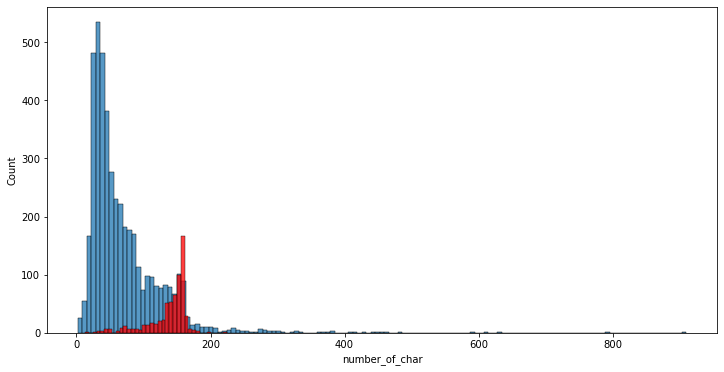

In [37]:
# ploting the nuymber of characters in both ham and spam
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot (df[df['target']==0]['number_of_char'])
sns.histplot(df[df['target']==1]['number_of_char'],color='red')


<AxesSubplot:xlabel='num_words', ylabel='Count'>

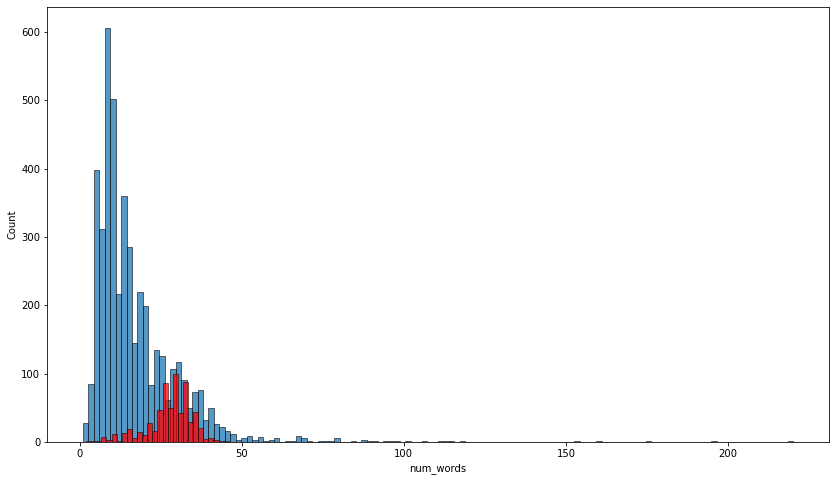

In [38]:
plt.figure(figsize=(14,8))
sns.histplot (df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sent', ylabel='Count'>

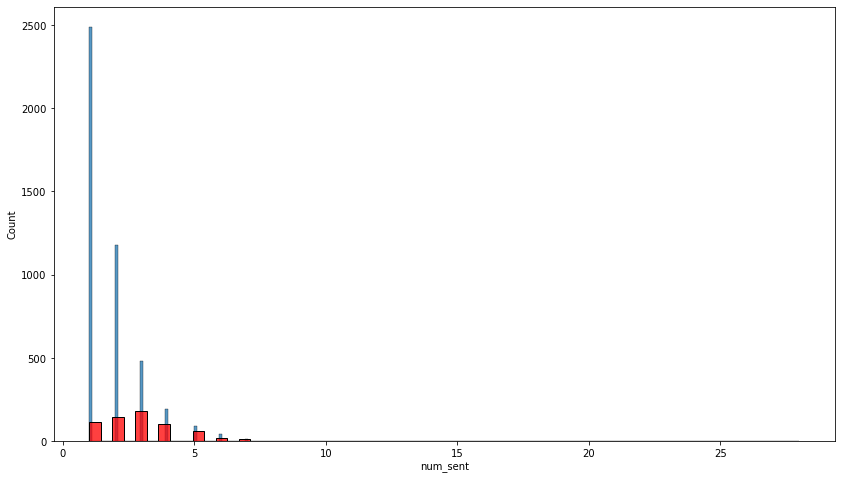

In [39]:
plt.figure(figsize=(14,8))
sns.histplot (df[df['target']==0]['num_sent'])
sns.histplot(df[df['target']==1]['num_sent'],color='red')

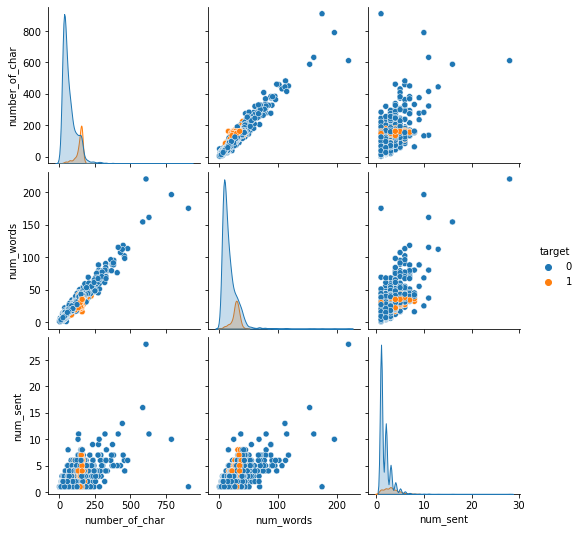

In [40]:
# ploiting a pair plot:
    # a pair plot is a plot that shows relation ship of 
    #target with all new added features
    
sns.pairplot(df, hue='target')

In [41]:
df.corr()

,target,number_of_char,num_words,num_sent
target,1.000000,0.384717,0.262984,0.284901
number_of_char,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sent,0.284901,0.638143,0.684541,1.000000


In [42]:
df['target'].corr(df['num_words'])

0.2629835742852427

In [43]:
df['number_of_char'].corr(df['num_words'])

0.9657696704127142

In [44]:
df['num_words'].corr(df['num_sent'])

0.6845408831149301

<AxesSubplot:>

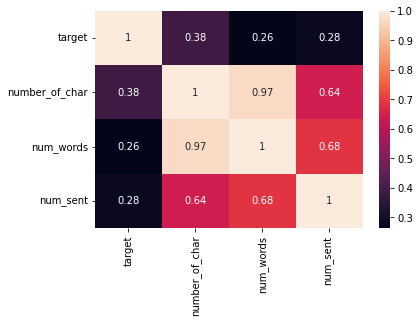

In [45]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing
    - convert all text in lower case
    - Tokenization
    - Remove Special characters
    - Removing stopwords punctuation 
    - Stemming
    

In [46]:
#need to filters stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iam18\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [47]:
from nltk.corpus import stopwords 

Stop words  set of commonly used words  language. 
Examples  stop words  English  “a”, “the”, “is”, “are”  
Stop words  commonly used  Text Mining  Natural Language Processing 
(NLP) eliminate words  commonly used carry very little useful information.

In [48]:
stopwords = stopwords.words('english')

In [49]:
import string
punctuation = string.punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
# Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [51]:
#test code 
ps.stem("beautiful")

'beauti'

In [52]:
def text_transformer(text):
    
    # convert all text in lower case
    text = text.lower()
    
    #Tokenization
    y=[]
    text = nltk.word_tokenize(text)
    
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    # Removing stopwords and punctuations
    for i in text:
        if (i not in stopwords) and (i not in punctuation):
            y.append(i)
    text=y[:]
    y.clear()
    
    
    # apply stemming
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [53]:
"%".isalnum()

False

In [54]:
st=["hgello","hi"]
" ".join(st)

'hgello hi'

In [55]:
#test code
text = nltk.word_tokenize("Hello how are you I am from Pakistan iam 30 ")

In [56]:
text

['Hello', 'how', 'are', 'you', 'I', 'am', 'from', 'Pakistan', 'iam', '30']

In [57]:
alst = [1,2,3,4]
blst = alst[:]

In [58]:
blst

[1, 2, 3, 4]

In [59]:
blst.clear()

In [60]:
blst

[]

In [61]:
alst

[1, 2, 3, 4]

In [62]:
#example testing trasformer function

text_transformer("I am @ good ! boy studying what a wonderful picture it is.?")

'good boy studi wonder pictur'

In [63]:
text_transformer(df.text[10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [64]:
df['transformed_text'] = df.text.apply(text_transformer)

In [69]:
!pip install WorldCloud

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement WorldCloud (from versions: none)
ERROR: No matching distribution found for WorldCloud


In [70]:
wc = WordCloud(width=800,height=400, min_font_size=10, background_color='white')

NameError: name 'WordCloud' is not defined

In [ ]:
spam_word_cloud = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(spam_word_cloud)

# Corpus: 
          A collection of authentic text or audio organized into datasets.
     - We need to make copus of spam messages to get frequency of each word in transformed text.
     

In [ ]:
spam_corpus =[]
lst = df[df.target==1]['transformed_text'].to_list()
for msg in lst:
    for word in msg.split():
        spam_corpus.append(word)


In [ ]:
from collections import Counter

In [ ]:
Counter(spam_corpus)

In [ ]:
Counter(spam_corpus).most_common(50)

In [ ]:
top50FrequentWords = pd.DataFrame(Counter(spam_corpus).most_common(50))

In [ ]:
top50FrequentWords

In [ ]:
top50Words = pd.DataFrame(Counter(spam_corpus).most_common(50))[0]
top50Freqs = pd.DataFrame(Counter(spam_corpus).most_common(50))[1]

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.barplot(top50Words,top50Freqs)
ax.set(xlabel='words', ylabel='frequency')
plt.xticks(rotation='vertical')
plt.show()